<a href="https://colab.research.google.com/github/HarshSonaiya/DL/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout
from keras import Sequential


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:100]
y_test = y_test[:100]
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
len(x_train)

5000

In [5]:
len(x_test)

100

In [6]:
model =  Sequential()

model.add(keras.Input(shape=(224, 224, 3)))

# AlexNet architecture
model.add(Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,787,978 (178.48 MB)

 Trainable params: 46,787,978 (178.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.1011 - loss: 3.0115 - val_accuracy: 0.1200 - val_loss: 2.2858
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.1664 - loss: 2.2039 - val_accuracy: 0.3300 - val_loss: 1.9878
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.2833 - loss: 1.9517 - val_accuracy: 0.3200 - val_loss: 1.9408
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.2877 - loss: 1.9119 - val_accuracy: 0.2800 - val_loss: 1.8081
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.3375 - loss: 1.7584 - val_accuracy: 0.3400 - val_loss: 1.9723
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.3536 - loss: 1.7700 - val_accuracy: 0.4100 - val_loss: 1.7547
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.4138 - loss: 1.6017 - val_accuracy: 0.4400 - val_loss: 1.6647
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.3846 - loss: 1.6532 - val_accuracy

In [9]:
print('Training Completed.')

Training Completed.


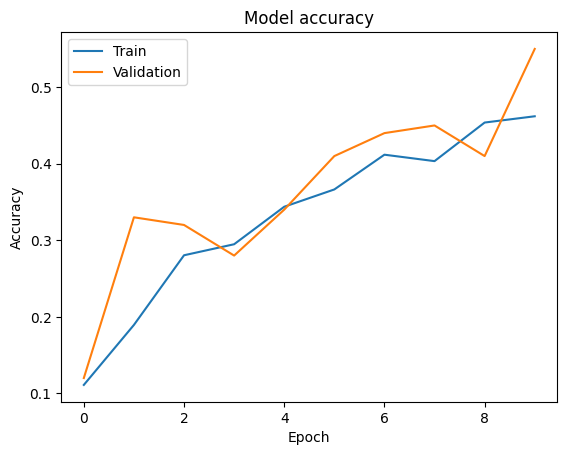

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()